In [305]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.linear_model import LinearRegression

In [307]:
# Open csv file
efficiency_fva = pd.read_csv('offensive_efficiency_scores.csv')

In [309]:
# See first five games in the file
# Win = 1, Loss = 0 
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000


In [311]:
dummy = pd.get_dummies(efficiency_fva['WinOrLoss'])
efficiency_fva = pd.concat([efficiency_fva, dummy], axis = 1)
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356,0,1
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565,0,1
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937,0,1
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000,0,1
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000,1,0


In [313]:
# Create table with numeric values 
efficiency_fva_num = efficiency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [315]:
# Differences in wins and losses
win = efficiency_fva_num[efficiency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficiency_fva_num[efficiency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,73.742857,53.266667,26.914286,8.866667,16.123810,11.209524,0.595022,44.598170,51.823082
std,12.640007,8.863567,5.937356,4.095182,4.923834,3.707309,0.081432,12.768972,15.327019
min,48.000000,35.000000,15.000000,1.000000,7.000000,4.000000,0.403226,20.210526,23.090526
25%,65.000000,46.000000,22.000000,5.000000,13.000000,8.000000,0.534091,35.065574,39.700328
50%,73.000000,53.000000,27.000000,9.000000,16.000000,11.000000,0.594203,43.029412,50.154937
75%,82.000000,60.000000,31.000000,12.000000,19.000000,13.000000,0.657534,52.920000,61.943415
max,108.000000,75.000000,43.000000,19.000000,30.000000,21.000000,0.784091,82.329545,97.823182


In [317]:
# Now losses
loss.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,59.043478,50.413043,21.163043,7.413043,12.032609,13.347826,0.484382,29.167526,33.716343
std,10.711925,7.341216,4.627384,3.564638,4.149543,5.034900,0.084743,9.309533,11.045488
min,34.000000,25.000000,11.000000,1.000000,4.000000,0.000000,0.307692,11.213115,12.870164
25%,53.000000,45.750000,18.000000,5.000000,9.000000,10.000000,0.416667,21.415751,24.748933
50%,59.000000,51.500000,22.000000,7.000000,12.000000,13.000000,0.485045,28.526923,33.025299
75%,65.000000,55.000000,24.000000,10.000000,14.000000,16.000000,0.536549,34.685238,40.927671
max,81.000000,72.000000,33.000000,21.000000,28.000000,26.000000,0.693878,54.296703,68.561319


In [319]:
# Correlations
efficiency_correlations = efficiency_fva_num.corr()
efficiency_correlations

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.557284,0.907698,0.235676,0.643304,-0.231911,0.767258,0.946839,0.926142,-0.530462,0.530462
FieldGoalAttempts,0.557284,1.000000,0.643969,0.605368,0.386301,-0.164310,0.272874,0.462276,0.458706,-0.172148,0.172148
FieldGoalsMade,0.907698,0.643969,1.000000,0.282366,0.693991,-0.239348,0.820573,0.924441,0.918023,-0.473420,0.473420
OffensiveRebounds,0.235676,0.605368,0.282366,1.000000,0.158355,0.064158,0.184010,0.235481,0.236579,-0.185718,0.185718
Assists,0.643304,0.386301,0.693991,0.158355,1.000000,-0.204735,0.766344,0.749222,0.804482,-0.408891,0.408891
Turnovers,-0.231911,-0.164310,-0.239348,0.064158,-0.204735,1.000000,-0.486842,-0.373427,-0.363737,0.237931,-0.237931
OffensiveEfficiency,0.767258,0.272874,0.820573,0.184010,0.766344,-0.486842,1.000000,0.918535,0.926568,-0.555762,0.555762
EfficientPointsScored,0.946839,0.462276,0.924441,0.235481,0.749222,-0.373427,0.918535,1.000000,0.993827,-0.565430,0.565430
RawEOP,0.926142,0.458706,0.918023,0.236579,0.804482,-0.363737,0.926568,0.993827,1.000000,-0.558121,0.558121
Loss,-0.530462,-0.172148,-0.473420,-0.185718,-0.408891,0.237931,-0.555762,-0.565430,-0.558121,1.000000,-1.000000


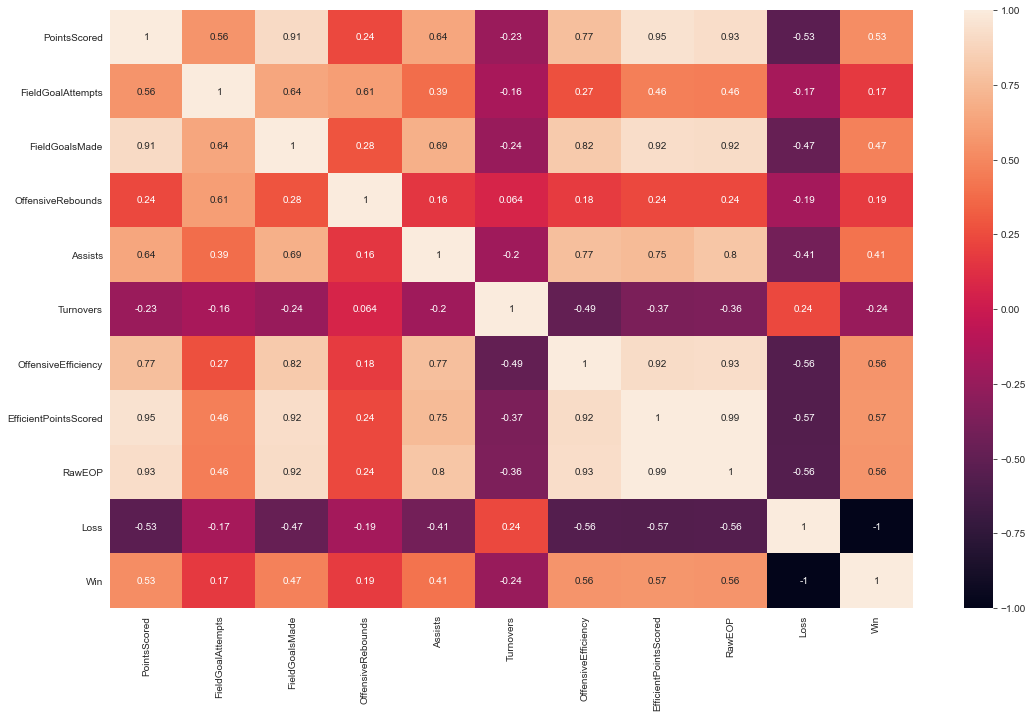

In [321]:
# Correlation heatmap
plt.figure(figsize=(18,11))
sns.heatmap(efficiency_correlations, annot = True );

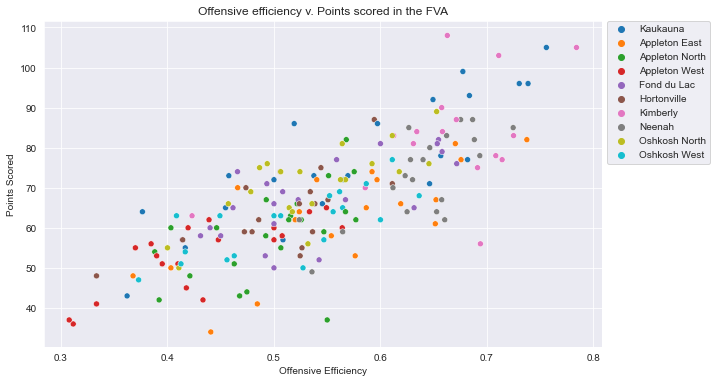

In [323]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="Team",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
#place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Offensive efficiency v. Points scored in the FVA");



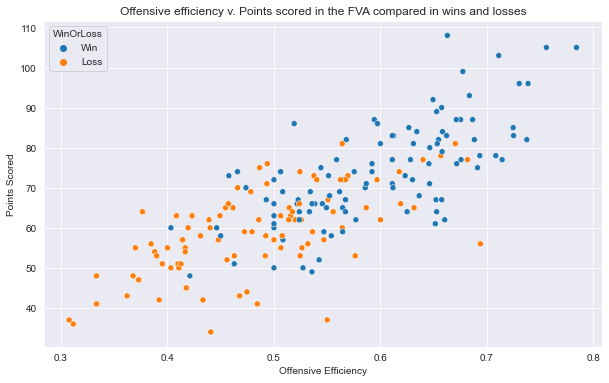

In [325]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
plt.title("Offensive efficiency v. Points scored in the FVA compared in wins and losses");


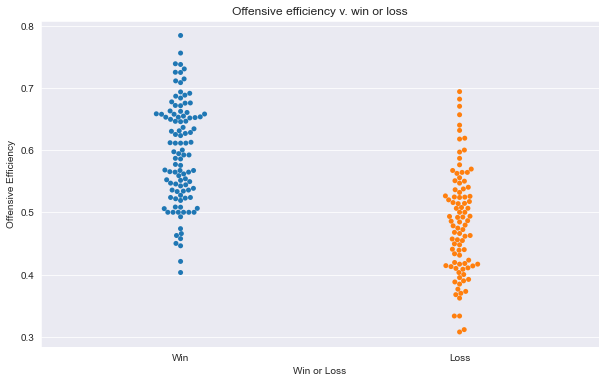

In [327]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficiency_fva['WinOrLoss'],
              y=efficiency_fva['OffensiveEfficiency'])
plt.ylabel("Offensive Efficiency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficiency v. win or loss");

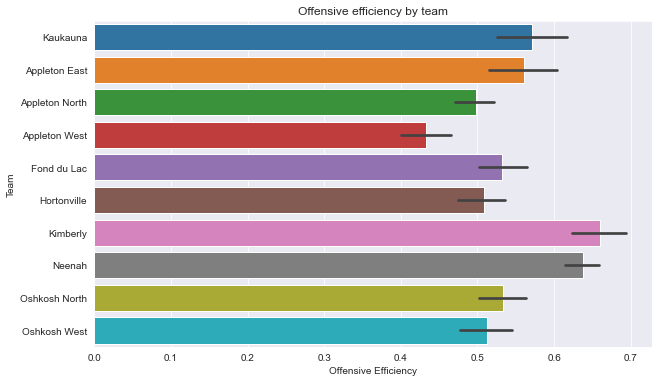

In [329]:
plt.figure(figsize=(10,6))
sns.barplot(x="OffensiveEfficiency", y="Team", data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

<Figure size 720x432 with 0 Axes>

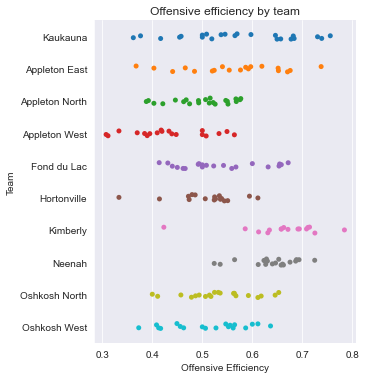

In [330]:
# Checking team by team offensive efficency 
plt.figure(figsize=(10,6))
sns.catplot(x = "OffensiveEfficiency", y = "Team", data = efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

<Figure size 720x432 with 0 Axes>

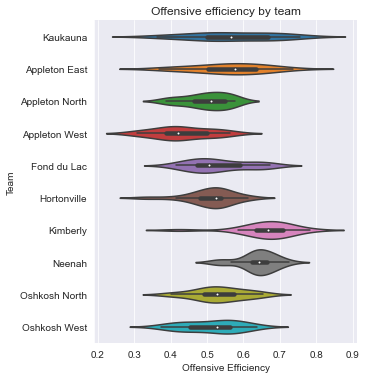

In [331]:
# Checking consistency of teams
plt.figure(figsize=(10,6))
sns.catplot(x="OffensiveEfficiency",y="Team",data=efficiency_fva, kind = 'violin')
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

In [332]:
# Creating data frames for teams 
appleton_east = efficiency_fva[efficiency_fva.Team == 'Appleton East']
appleton_north = efficiency_fva[efficiency_fva.Team == 'Appleton North']
appleton_west = efficiency_fva[efficiency_fva.Team == 'Appleton West']
fond_du_lac = efficiency_fva[efficiency_fva.Team == 'Fond du Lac']
hortonville = efficiency_fva[efficiency_fva.Team == 'Hortonville']
kaukauna = efficiency_fva[efficiency_fva.Team == 'Kaukauna']
kimberly = efficiency_fva[efficiency_fva.Team == 'Kimberly']
neenah = efficiency_fva[efficiency_fva.Team == 'Neenah']
oshkosh_north = efficiency_fva[efficiency_fva.Team == 'Oshkosh North']
oshkosh_west = efficiency_fva[efficiency_fva.Team == 'Oshkosh West']

In [333]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [334]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficiency_fva[efficiency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficiency_fva[efficiency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficiency_fva[efficiency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficiency_fva[efficiency_fva.Opponent == 'Kimberly']
neenah_opp = efficiency_fva[efficiency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh West']


In [335]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [336]:
# Appleton East offense correlations
appleton_east_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.512449,0.881139,0.019684,0.819838,-0.158512,0.738823,0.932928,0.923716,-0.359225,0.359225
FieldGoalAttempts,0.512449,1.000000,0.532020,0.402312,0.470769,-0.027928,0.153907,0.365091,0.400549,0.091422,-0.091422
FieldGoalsMade,0.881139,0.532020,1.000000,-0.110803,0.904112,-0.259210,0.828723,0.920045,0.927477,-0.278174,0.278174
OffensiveRebounds,0.019684,0.402312,-0.110803,1.000000,-0.096196,0.164527,-0.073926,-0.033370,-0.025276,-0.167812,0.167812
Assists,0.819838,0.470769,0.904112,-0.096196,1.000000,-0.297073,0.821102,0.897532,0.923093,-0.388322,0.388322
Turnovers,-0.158512,-0.027928,-0.259210,0.164527,-0.297073,1.000000,-0.567025,-0.381288,-0.376496,0.244050,-0.244050
OffensiveEfficiency,0.738823,0.153907,0.828723,-0.073926,0.821102,-0.567025,1.000000,0.922172,0.910392,-0.523824,0.523824
EfficientPointsScored,0.932928,0.365091,0.920045,-0.033370,0.897532,-0.381288,0.922172,1.000000,0.995239,-0.466796,0.466796
RawEOP,0.923716,0.400549,0.927477,-0.025276,0.923093,-0.376496,0.910392,0.995239,1.000000,-0.454938,0.454938
Loss,-0.359225,0.091422,-0.278174,-0.167812,-0.388322,0.244050,-0.523824,-0.466796,-0.454938,1.000000,-1.000000


In [204]:
# Appleton East offense compared in wins and losses 
appleton_east_win = appleton_east_num[appleton_east_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_east_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_east_loss = appleton_east_num[appleton_east_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_east_offense = pd.concat(frames)
appleton_east_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Averages in Wins,69.0,46.714286,24.857143,6.000000,19.571429,10.142857,0.626661,43.628968,52.518000
Number of Losses,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Averages in Losses,59.5,47.916667,21.916667,4.833333,15.500000,12.500000,0.522596,31.933188,38.111331


In [205]:
# Appleton East defense correlations
appleton_east_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.237122,0.837748,-0.286905,0.577379,-0.453190,0.758520,0.944193,0.927449,-0.446818,0.446818
FieldGoalAttempts,0.237122,1.000000,0.500233,0.642947,0.089190,-0.217677,0.042435,0.170559,0.164772,-0.174450,0.174450
FieldGoalsMade,0.837748,0.500233,1.000000,-0.067253,0.627925,-0.462554,0.798038,0.875525,0.876282,-0.438304,0.438304
OffensiveRebounds,-0.286905,0.642947,-0.067253,1.000000,-0.492632,-0.038338,-0.296141,-0.284719,-0.309629,0.195561,-0.195561
Assists,0.577379,0.089190,0.627925,-0.492632,1.000000,-0.368847,0.720737,0.669491,0.723098,-0.350813,0.350813
Turnovers,-0.453190,-0.217677,-0.462554,-0.038338,-0.368847,1.000000,-0.719683,-0.628601,-0.636649,0.048346,-0.048346
OffensiveEfficiency,0.758520,0.042435,0.798038,-0.296141,0.720737,-0.719683,1.000000,0.925615,0.941216,-0.291132,0.291132
EfficientPointsScored,0.944193,0.170559,0.875525,-0.284719,0.669491,-0.628601,0.925615,1.000000,0.996805,-0.389615,0.389615
RawEOP,0.927449,0.164772,0.876282,-0.309629,0.723098,-0.636649,0.941216,0.996805,1.000000,-0.389461,0.389461
Loss,-0.446818,-0.174450,-0.438304,0.195561,-0.350813,0.048346,-0.291132,-0.389615,-0.389461,1.000000,-1.000000


In [206]:
# Appleton East opponent's offense compared in wins and losses 
appleton_east_win_opp = appleton_east_opp_num[appleton_east_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_east_loss_opp = appleton_east_opp_num[appleton_east_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_east_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_east_opp = pd.concat(frames)
appleton_east_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,61.000000,52.166667,23.166667,8.666667,11.833333,11.166667,0.525141,32.802925,37.721634
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,72.444444,54.666667,27.333333,7.222222,14.222222,10.777778,0.574167,42.166610,48.457744


In [338]:
#FVA Appleton East games 
game = [appleton_east, appleton_east_opp]
appleton_east_game = pd.concat(game)
appleton_east_game = pd.merge(left = appleton_east, right = appleton_east_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
appleton_east_game = appleton_east_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
appleton_east_game = appleton_east_game.rename(columns = {'PointsScored_x': 'AE_Points', 'FieldGoalAttempts_x': 'AE_FG_Attempts', 'FieldGoalsMade_x': 'AE_FG_Made', 'OffensiveRebounds_x': 'AE_OffensiveRebounds' , 'Assists_x': 'AE_Assists', 'Turnovers_x': 'AE_Turnovers', 'OffensiveEfficiency_x': 'AE_OffensiveEfficiency', 'EfficientPointsScored_x': 'AE_EfficientPointsScored', 'RawEOP_x': 'AE_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'AE_Win', 'Win_y' : 'Opp_Win '})

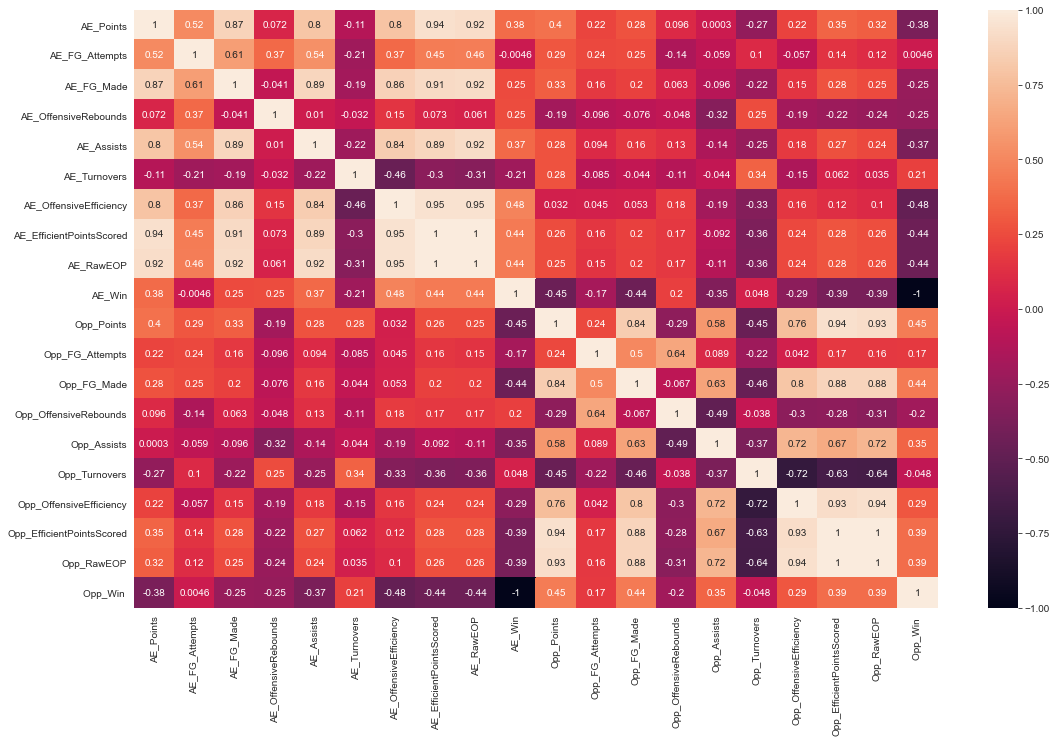

In [339]:
#Appleton East FVA game correlations
plt.figure(figsize=(18,11))
sns.heatmap(appleton_east_game.corr(), annot = True);

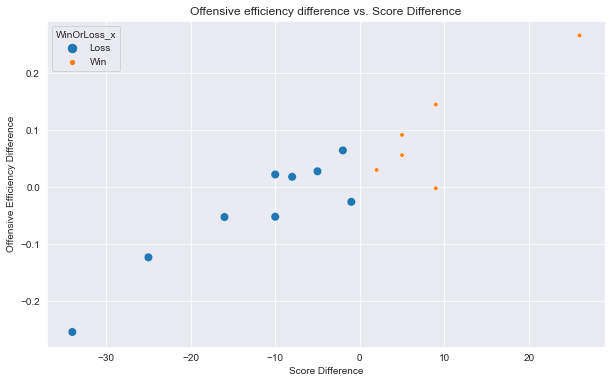

In [381]:
appleton_east_game['ScoreDifference'] = appleton_east_game['AE_Points'] - appleton_east_game['Opp_Points']
appleton_east_game['OffensiveEfficiencyDifference'] = appleton_east_game['AE_OffensiveEfficiency'] - appleton_east_game['Opp_OffensiveEfficiency']
appleton_east_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = appleton_east_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [207]:
# Appleton North offense correlations
appleton_north_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.778694,0.883580,0.390363,0.442515,0.226720,0.528967,0.936098,0.920332,-0.541225,0.541225
FieldGoalAttempts,0.778694,1.000000,0.853837,0.622871,0.559145,0.050723,0.508274,0.780765,0.787155,-0.294137,0.294137
FieldGoalsMade,0.883580,0.853837,1.000000,0.356742,0.433856,0.133770,0.641773,0.910816,0.888409,-0.433307,0.433307
OffensiveRebounds,0.390363,0.622871,0.356742,1.000000,0.410614,0.115416,0.285556,0.412276,0.436872,-0.219547,0.219547
Assists,0.442515,0.559145,0.433856,0.410614,1.000000,0.086475,0.540425,0.530672,0.625339,0.066810,-0.066810
Turnovers,0.226720,0.050723,0.133770,0.115416,0.086475,1.000000,-0.477539,-0.032176,-0.026234,-0.095022,0.095022
OffensiveEfficiency,0.528967,0.508274,0.641773,0.285556,0.540425,-0.477539,1.000000,0.787734,0.801786,-0.241872,0.241872
EfficientPointsScored,0.936098,0.780765,0.910816,0.412276,0.530672,-0.032176,0.787734,1.000000,0.991765,-0.489191,0.489191
RawEOP,0.920332,0.787155,0.888409,0.436872,0.625339,-0.026234,0.801786,0.991765,1.000000,-0.448215,0.448215
Loss,-0.541225,-0.294137,-0.433307,-0.219547,0.066810,-0.095022,-0.241872,-0.489191,-0.448215,1.000000,-1.000000


In [209]:
# Appleton North offense compared in wins and losses 
appleton_north_win = appleton_north_num[appleton_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_north_loss = appleton_north_num[appleton_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_north_offense = pd.concat(frames)
appleton_north_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,12.000000,12.00,12.000000,12.0,12.00,12.0,12.000000,12.000000,12.000000
Averages in Wins,63.833333,49.25,22.166667,7.5,12.25,13.0,0.511092,32.994983,37.987566
Number of Losses,10.000000,10.00,10.000000,10.0,10.00,10.0,10.000000,10.000000,10.000000
Averages in Losses,52.000000,45.00,18.000000,6.3,12.70,12.1,0.482649,25.211629,29.811322


In [210]:
# Appleton North opponent's offense correlations
appleton_north_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.309990,0.904055,0.149827,0.587471,-0.207910,0.783718,0.938132,0.918865,-0.498535,0.498535
FieldGoalAttempts,0.309990,1.000000,0.390763,0.794325,0.262610,-0.305470,0.088434,0.265219,0.273684,0.099211,-0.099211
FieldGoalsMade,0.904055,0.390763,1.000000,0.099651,0.817700,-0.374251,0.919810,0.973292,0.980125,-0.515304,0.515304
OffensiveRebounds,0.149827,0.794325,0.099651,1.000000,-0.155948,-0.091023,-0.168528,0.049007,0.030091,0.264419,-0.264419
Assists,0.587471,0.262610,0.817700,-0.155948,1.000000,-0.234423,0.813633,0.743075,0.789399,-0.461318,0.461318
Turnovers,-0.207910,-0.305470,-0.374251,-0.091023,-0.234423,1.000000,-0.486550,-0.388347,-0.388130,0.625364,-0.625364
OffensiveEfficiency,0.783718,0.088434,0.919810,-0.168528,0.813633,-0.486550,1.000000,0.932178,0.942240,-0.697020,0.697020
EfficientPointsScored,0.938132,0.265219,0.973292,0.049007,0.743075,-0.388347,0.932178,1.000000,0.996858,-0.597038,0.597038
RawEOP,0.918865,0.273684,0.980125,0.030091,0.789399,-0.388130,0.942240,0.996858,1.000000,-0.595849,0.595849
Loss,-0.498535,0.099211,-0.515304,0.264419,-0.461318,0.625364,-0.697020,-0.597038,-0.595849,1.000000,-1.000000


In [211]:
# Appleton North opponent's offense compared in wins and losses 
appleton_north_win_opp = appleton_north_opp_num[appleton_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_north_loss_opp = appleton_north_opp_num[appleton_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_north_opp = pd.concat(frames)
appleton_north_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,5.0,5.00,5.000,5.000,5.00,5.00,5.000000,5.000000,5.000000
Averages in Wins,53.0,53.40,18.000,9.800,11.40,15.20,0.414030,22.893164,26.624034
Number of Losses,8.0,8.00,8.000,8.000,8.00,8.00,8.000000,8.000000,8.000000
Averages in Losses,67.5,51.75,24.375,7.875,15.25,9.75,0.570617,39.019413,45.606616


In [340]:
#FVA Appleton North games
game = [appleton_north, appleton_north_opp]
appleton_north_game = pd.concat(game)
appleton_north_game = pd.merge(left = appleton_north, right = appleton_north_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
appleton_north_game = appleton_north_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
appleton_north_game = appleton_north_game.rename(columns = {'PointsScored_x': 'AN_Points', 'FieldGoalAttempts_x': 'AN_FG_Attempts', 'FieldGoalsMade_x': 'AN_FG_Made', 'OffensiveRebounds_x': 'AN_OffensiveRebounds' , 'Assists_x': 'AN_Assists', 'Turnovers_x': 'AN_Turnovers', 'OffensiveEfficiency_x': 'AN_OffensiveEfficiency', 'EfficientPointsScored_x': 'AN_EfficientPointsScored', 'RawEOP_x': 'AN_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'AN_Win', 'Win_y' : 'Opp_Win '})

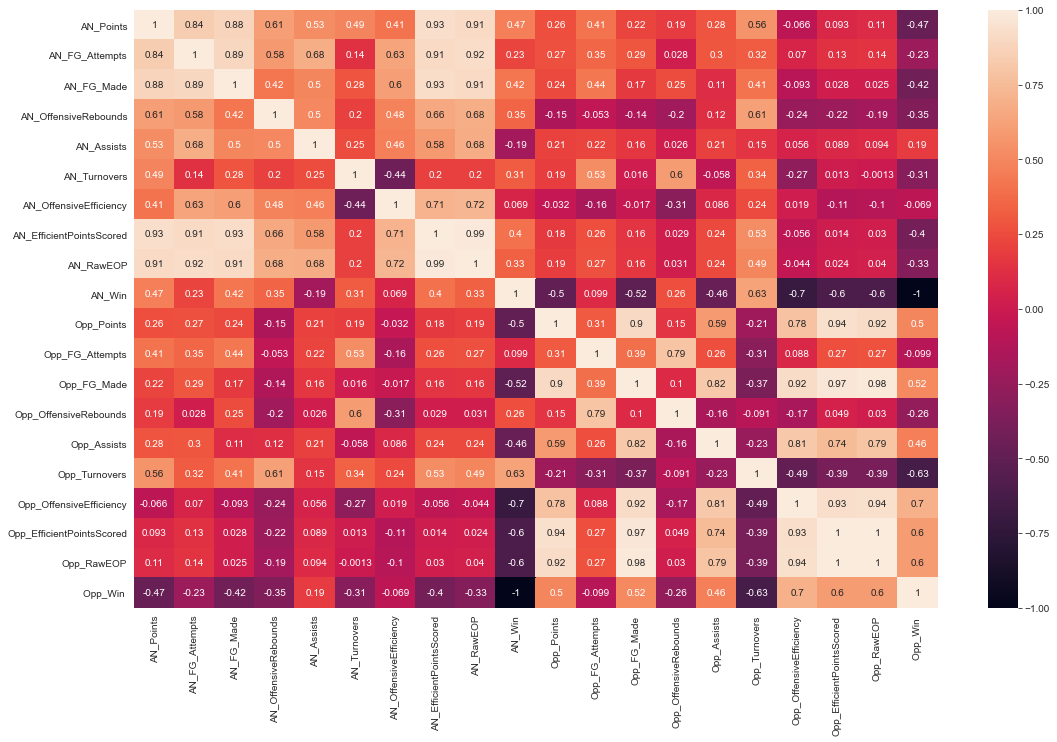

In [341]:
#Appleton North FVA game correlations
plt.figure(figsize=(18,11))
sns.heatmap(appleton_north_game.corr(), annot = True);

In [212]:
# Appleton West offense correlations
appleton_west_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.337162,0.913460,-0.066431,0.384656,-0.029284,0.788518,0.926536,0.881722,-0.488768,0.488768
FieldGoalAttempts,0.337162,1.000000,0.482070,0.410106,0.599854,-0.258856,0.377985,0.362003,0.402723,-0.150866,0.150866
FieldGoalsMade,0.913460,0.482070,1.000000,0.121322,0.427805,-0.067503,0.868898,0.921490,0.885511,-0.346566,0.346566
OffensiveRebounds,-0.066431,0.410106,0.121322,1.000000,0.217874,-0.081301,0.288064,0.150492,0.178837,-0.341715,0.341715
Assists,0.384656,0.599854,0.427805,0.217874,1.000000,-0.056951,0.577130,0.530634,0.651268,-0.341587,0.341587
Turnovers,-0.029284,-0.258856,-0.067503,-0.081301,-0.056951,1.000000,-0.302348,-0.196722,-0.198075,0.233415,-0.233415
OffensiveEfficiency,0.788518,0.377985,0.868898,0.288064,0.577130,-0.302348,1.000000,0.955816,0.959698,-0.550783,0.550783
EfficientPointsScored,0.926536,0.362003,0.921490,0.150492,0.530634,-0.196722,0.955816,1.000000,0.985363,-0.590921,0.590921
RawEOP,0.881722,0.402723,0.885511,0.178837,0.651268,-0.198075,0.959698,0.985363,1.000000,-0.583410,0.583410
Loss,-0.488768,-0.150866,-0.346566,-0.341715,-0.341587,0.233415,-0.550783,-0.590921,-0.583410,1.000000,-1.000000


In [214]:
# Appleton West Offense compared in wins and losses 
appleton_west_win = appleton_west_num[appleton_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_west_loss = appleton_west_num[appleton_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_west_offense = pd.concat(frames)
appleton_west_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,3.0000,3.000000,3.0000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000
Averages in Wins,63.0000,54.666667,23.0000,12.333333,13.0,12.666667,0.527543,33.279186,38.017709
Number of Losses,16.0000,16.000000,16.0000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000
Averages in Losses,51.3125,52.062500,19.0625,9.250000,9.0,15.437500,0.414419,21.659318,24.725215


In [215]:
# Appleton West opponent's offense correlations
appleton_west_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.646478,0.945925,0.221315,0.660020,-0.445892,0.825788,0.964890,0.943379,NaN,NaN
FieldGoalAttempts,0.646478,1.000000,0.665338,0.648841,0.529350,-0.120483,0.410513,0.552303,0.558334,NaN,NaN
FieldGoalsMade,0.945925,0.665338,1.000000,0.219138,0.730605,-0.439225,0.884712,0.955443,0.951415,NaN,NaN
OffensiveRebounds,0.221315,0.648841,0.219138,1.000000,0.118649,0.138483,0.186908,0.205795,0.192379,NaN,NaN
Assists,0.660020,0.529350,0.730605,0.118649,1.000000,-0.331961,0.758988,0.728070,0.808083,NaN,NaN
Turnovers,-0.445892,-0.120483,-0.439225,0.138483,-0.331961,1.000000,-0.596462,-0.553353,-0.547090,NaN,NaN
OffensiveEfficiency,0.825788,0.410513,0.884712,0.186908,0.758988,-0.596462,1.000000,0.932199,0.943869,NaN,NaN
EfficientPointsScored,0.964890,0.552303,0.955443,0.205795,0.728070,-0.553353,0.932199,1.000000,0.991775,NaN,NaN
RawEOP,0.943379,0.558334,0.951415,0.192379,0.808083,-0.547090,0.943869,0.991775,1.000000,NaN,NaN
Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
# Appleton West opponent's offense compared in wins and losses 
appleton_west_win_opp = appleton_west_opp_num[appleton_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_west_loss_opp = appleton_west_opp_num[appleton_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_west_opp = pd.concat(frames)
appleton_west_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Averages in Wins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Losses,15.000000,15.0,15.0,15.0,15.000000,15.000000,15.000000,15.000000,15.000000
Averages in Losses,77.933333,56.6,28.0,11.4,18.666667,11.333333,0.613533,48.891887,57.944117


In [217]:
# Fond du Lac offense correlations
fond_du_lac_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.271657,0.740313,0.017901,0.560298,-0.318206,0.678447,0.910144,0.890654,-0.385879,0.385879
FieldGoalAttempts,0.271657,1.000000,0.506347,0.457194,0.133760,0.033633,-0.130063,0.058530,0.062951,0.167453,-0.167453
FieldGoalsMade,0.740313,0.506347,1.000000,-0.104875,0.657895,-0.287931,0.662541,0.759469,0.771895,-0.306790,0.306790
OffensiveRebounds,0.017901,0.457194,-0.104875,1.000000,-0.166420,0.392293,-0.222876,-0.123791,-0.126326,0.047362,-0.047362
Assists,0.560298,0.133760,0.657895,-0.166420,1.000000,-0.225397,0.764213,0.718700,0.744210,-0.483172,0.483172
Turnovers,-0.318206,0.033633,-0.287931,0.392293,-0.225397,1.000000,-0.580172,-0.496129,-0.475163,-0.107524,0.107524
OffensiveEfficiency,0.678447,-0.130063,0.662541,-0.222876,0.764213,-0.580172,1.000000,0.918679,0.928530,-0.450501,0.450501
EfficientPointsScored,0.910144,0.058530,0.759469,-0.123791,0.718700,-0.496129,0.918679,1.000000,0.993512,-0.449016,0.449016
RawEOP,0.890654,0.062951,0.771895,-0.126326,0.744210,-0.475163,0.928530,0.993512,1.000000,-0.462150,0.462150
Loss,-0.385879,0.167453,-0.306790,0.047362,-0.483172,-0.107524,-0.450501,-0.449016,-0.462150,1.000000,-1.000000


In [218]:
# Fond du Lac offense compared in wins and losses 
fond_du_lac_win = fond_du_lac_num[fond_du_lac_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = fond_du_lac_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fond_du_lac_loss = fond_du_lac_num[fond_du_lac_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
fond_du_lac_offense = pd.concat(frames)
fond_du_lac_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000
Averages in Wins,69.333333,47.200000,23.200000,5.533333,14.133333,11.133333,0.55683,39.106536,44.619805
Number of Losses,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000
Averages in Losses,61.285714,49.714286,20.714286,5.857143,10.000000,10.285714,0.48044,29.590154,33.301037


In [219]:
# Fond du Lac opponent's offense correlations
fond_du_lac_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.510088,0.962787,-0.105914,0.663271,-0.132834,0.738236,0.939933,0.921601,-0.524954,0.524954
FieldGoalAttempts,0.510088,1.000000,0.529753,0.498952,0.401563,-0.169617,0.181821,0.394782,0.414507,-0.124739,0.124739
FieldGoalsMade,0.962787,0.529753,1.000000,-0.109763,0.746854,-0.246998,0.808603,0.957277,0.944804,-0.532086,0.532086
OffensiveRebounds,-0.105914,0.498952,-0.109763,1.000000,0.030366,-0.020082,-0.062674,-0.114638,-0.075056,0.037246,-0.037246
Assists,0.663271,0.401563,0.746854,0.030366,1.000000,-0.628468,0.866723,0.827829,0.866766,-0.484693,0.484693
Turnovers,-0.132834,-0.169617,-0.246998,-0.020082,-0.628468,1.000000,-0.563384,-0.390857,-0.428992,0.126557,-0.126557
OffensiveEfficiency,0.738236,0.181821,0.808603,-0.062674,0.866723,-0.563384,1.000000,0.905417,0.912026,-0.576225,0.576225
EfficientPointsScored,0.939933,0.394782,0.957277,-0.114638,0.827829,-0.390857,0.905417,1.000000,0.995295,-0.575358,0.575358
RawEOP,0.921601,0.414507,0.944804,-0.075056,0.866766,-0.428992,0.912026,0.995295,1.000000,-0.563982,0.563982
Loss,-0.524954,-0.124739,-0.532086,0.037246,-0.484693,0.126557,-0.576225,-0.575358,-0.563982,1.000000,-1.000000


In [220]:
# Fond du Lac oppononet's offense compared in wins and losses 
fond_du_lac_win_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
fond_du_lac_loss_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = fond_du_lac_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
fond_du_lac_opp = pd.concat(frames)
fond_du_lac_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Wins,60.454545,52.090909,22.636364,7.909091,11.818182,10.090909,0.518290,31.829280,36.511829
Number of Losses,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Losses,75.500000,53.833333,29.666667,7.666667,16.500000,9.166667,0.640368,49.149868,56.780228


In [221]:
# Hortonville offense correlations
hortonville_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.541750,0.829149,0.614665,0.163214,-0.133166,0.659900,0.938463,0.898833,-0.778102,0.778102
FieldGoalAttempts,0.541750,1.000000,0.567054,0.784766,0.286651,-0.262510,0.164429,0.409988,0.422119,-0.630293,0.630293
FieldGoalsMade,0.829149,0.567054,1.000000,0.465701,0.267380,-0.145775,0.788728,0.877435,0.870577,-0.571865,0.571865
OffensiveRebounds,0.614665,0.784766,0.465701,1.000000,0.301327,-0.033088,0.246631,0.503063,0.508579,-0.635008,0.635008
Assists,0.163214,0.286651,0.267380,0.301327,1.000000,0.038078,0.473562,0.289787,0.439258,-0.307350,0.307350
Turnovers,-0.133166,-0.262510,-0.145775,-0.033088,0.038078,1.000000,-0.303909,-0.247988,-0.239338,0.291781,-0.291781
OffensiveEfficiency,0.659900,0.164429,0.788728,0.246631,0.473562,-0.303909,1.000000,0.870554,0.907594,-0.456160,0.456160
EfficientPointsScored,0.938463,0.409988,0.877435,0.503063,0.289787,-0.247988,0.870554,1.000000,0.986593,-0.703622,0.703622
RawEOP,0.898833,0.422119,0.870577,0.508579,0.439258,-0.239338,0.907594,0.986593,1.000000,-0.703434,0.703434
Loss,-0.778102,-0.630293,-0.571865,-0.635008,-0.307350,0.291781,-0.456160,-0.703622,-0.703434,1.000000,-1.000000


In [222]:
# Hortonville offense compared in wins and losses 
hortonville_win = hortonville_num[hortonville_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = hortonville_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
hortonville_loss = hortonville_num[hortonville_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
hortonville_offense = pd.concat(frames)
hortonville_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Averages in Wins,73.142857,62.285714,26.857143,13.571429,14.571429,13.285714,0.543079,39.839613,45.837185
Number of Losses,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
Averages in Losses,58.500000,52.900000,22.100000,9.600000,12.400000,15.300000,0.484668,28.573566,33.247099


In [223]:
# Hortonville opponent's offense correlations
hortonville_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.539443,0.948894,0.446401,0.848901,-0.591831,0.909473,0.976814,0.960418,-0.543276,0.543276
FieldGoalAttempts,0.539443,1.000000,0.643682,0.825428,0.695275,-0.282900,0.395073,0.536160,0.531760,0.087440,-0.087440
FieldGoalsMade,0.948894,0.643682,1.000000,0.525294,0.875076,-0.451220,0.870274,0.939447,0.926293,-0.339358,0.339358
OffensiveRebounds,0.446401,0.825428,0.525294,1.000000,0.652832,-0.124227,0.409876,0.494991,0.507704,-0.110858,0.110858
Assists,0.848901,0.695275,0.875076,0.652832,1.000000,-0.600887,0.888966,0.912712,0.924373,-0.316673,0.316673
Turnovers,-0.591831,-0.282900,-0.451220,-0.124227,-0.600887,1.000000,-0.706752,-0.656749,-0.646343,0.460374,-0.460374
OffensiveEfficiency,0.909473,0.395073,0.870274,0.409876,0.888966,-0.706752,1.000000,0.966181,0.963676,-0.567139,0.567139
EfficientPointsScored,0.976814,0.536160,0.939447,0.494991,0.912712,-0.656749,0.966181,1.000000,0.994569,-0.545581,0.545581
RawEOP,0.960418,0.531760,0.926293,0.507704,0.924373,-0.646343,0.963676,0.994569,1.000000,-0.514635,0.514635
Loss,-0.543276,0.087440,-0.339358,-0.110858,-0.316673,0.460374,-0.567139,-0.545581,-0.514635,1.000000,-1.000000


In [224]:
# Hortonville oppononet's offense compared in wins and losses 
hortonville_win_opp = hortonville_opp_num[hortonville_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
hortonville_loss_opp = hortonville_opp_num[hortonville_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = hortonville_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
hortonville_opp = pd.concat(frames)
hortonville_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,61.0,54.666667,22.166667,9.666667,14.666667,18.333333,0.473441,29.249721,34.604185
Number of Losses,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,73.0,53.222222,25.666667,10.666667,17.555556,13.555556,0.579700,43.067019,50.479275


In [225]:
# Kaukauna offense correlations
kaukauna_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.607601,0.945847,0.578728,0.788514,-0.122736,0.851150,0.958729,0.944110,-0.559384,0.559384
FieldGoalAttempts,0.607601,1.000000,0.611691,0.462201,0.598654,-0.278849,0.369390,0.527972,0.538906,-0.046299,0.046299
FieldGoalsMade,0.945847,0.611691,1.000000,0.613565,0.820446,-0.125409,0.915570,0.964829,0.958248,-0.437726,0.437726
OffensiveRebounds,0.578728,0.462201,0.613565,1.000000,0.589908,0.040570,0.615963,0.641383,0.651000,-0.311610,0.311610
Assists,0.788514,0.598654,0.820446,0.589908,1.000000,-0.188718,0.809689,0.857927,0.896079,-0.432826,0.432826
Turnovers,-0.122736,-0.278849,-0.125409,0.040570,-0.188718,1.000000,-0.277747,-0.217704,-0.219132,-0.146712,0.146712
OffensiveEfficiency,0.851150,0.369390,0.915570,0.615963,0.809689,-0.277747,1.000000,0.953665,0.952317,-0.458919,0.458919
EfficientPointsScored,0.958729,0.527972,0.964829,0.641383,0.857927,-0.217704,0.953665,1.000000,0.996068,-0.517270,0.517270
RawEOP,0.944110,0.538906,0.958248,0.651000,0.896079,-0.219132,0.952317,0.996068,1.000000,-0.507852,0.507852
Loss,-0.559384,-0.046299,-0.437726,-0.311610,-0.432826,-0.146712,-0.458919,-0.517270,-0.507852,1.000000,-1.000000


In [226]:
# Kaukauna offense compared in wins and losses
kaukauna_win = kaukauna_num[kaukauna_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kaukauna_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kaukauna_loss = kaukauna_num[kaukauna_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kaukauna_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kaukauna_offense = pd.concat(frames)
kaukauna_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
Averages in Wins,83.142857,57.142857,29.571429,10.000000,17.928571,11.357143,0.612446,51.979481,60.538759
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,65.444444,56.444444,23.333333,7.777778,12.777778,10.222222,0.506137,34.128448,39.186972


In [227]:
# Kaukauna opponent's offense correlations
kaukauna_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.145011,0.900725,-0.021246,0.565147,-0.275655,0.824587,0.953837,0.924552,-0.750224,0.750224
FieldGoalAttempts,0.145011,1.000000,0.382605,0.805308,-0.292717,0.194870,-0.150538,0.034392,-0.011263,0.043870,-0.043870
FieldGoalsMade,0.900725,0.382605,1.000000,0.227447,0.564391,-0.229463,0.815877,0.913267,0.902538,-0.701721,0.701721
OffensiveRebounds,-0.021246,0.805308,0.227447,1.000000,-0.244063,0.410418,-0.175919,-0.081921,-0.105387,0.059990,-0.059990
Assists,0.565147,-0.292717,0.564391,-0.244063,1.000000,-0.088898,0.776417,0.689601,0.753577,-0.392834,0.392834
Turnovers,-0.275655,0.194870,-0.229463,0.410418,-0.088898,1.000000,-0.516331,-0.426896,-0.412865,0.449490,-0.449490
OffensiveEfficiency,0.824587,-0.150538,0.815877,-0.175919,0.776417,-0.516331,1.000000,0.950842,0.969579,-0.777182,0.777182
EfficientPointsScored,0.953837,0.034392,0.913267,-0.081921,0.689601,-0.426896,0.950842,1.000000,0.993938,-0.791696,0.791696
RawEOP,0.924552,-0.011263,0.902538,-0.105387,0.753577,-0.412865,0.969579,0.993938,1.000000,-0.783771,0.783771
Loss,-0.750224,0.043870,-0.701721,0.059990,-0.392834,0.449490,-0.777182,-0.791696,-0.783771,1.000000,-1.000000


In [228]:
# Kaukauna oppenent's offense compared by win or loss
kaukauna_win_opp = kaukauna_opp_num[kaukauna_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
kaukauna_loss_opp = kaukauna_opp_num[kaukauna_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kaukauna_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = kaukauna_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [loss, win]
kaukauna_opp = pd.concat(frames)
kaukauna_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Losses,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Losses,83.500000,55.000000,31.500000,7.333333,18.333333,10.500000,0.648944,54.671426,64.010757
Number of Wins,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Wins,63.111111,55.555556,23.333333,7.777778,14.555556,15.222222,0.487747,31.003782,36.200954


In [383]:
#FVA kaukauna games 
game = [kaukauna, kaukauna_opp]
kaukauna_game = pd.concat(game)
kaukauna_game = pd.merge(left = kaukauna, right = kaukauna_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
kaukauna_game = kaukauna_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
kaukauna_game = kaukauna_game.rename(columns = {'PointsScored_x': 'kauk_Points', 'FieldGoalAttempts_x': 'kauk_FG_Attempts', 'FieldGoalsMade_x': 'kauk_FG_Made', 'OffensiveRebounds_x': 'kauk_OffensiveRebounds' , 'Assists_x': 'kauk_Assists', 'Turnovers_x': 'kauk_Turnovers', 'OffensiveEfficiency_x': 'kauk_OffensiveEfficiency', 'EfficientPointsScored_x': 'kauk_EfficientPointsScored', 'RawEOP_x': 'kauk_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'kauk_Win', 'Win_y' : 'Opp_Win '})

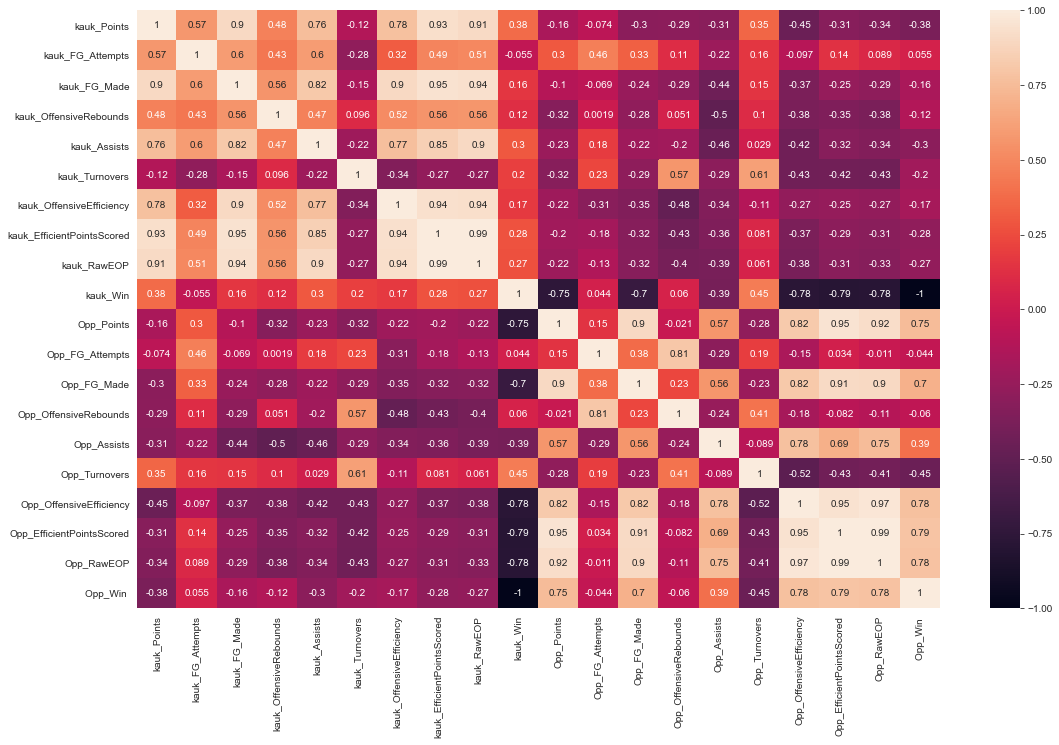

In [384]:
#Kaukauna FVA game correlations
plt.figure(figsize=(18,11))
sns.heatmap(kaukauna_game.corr(), annot = True);

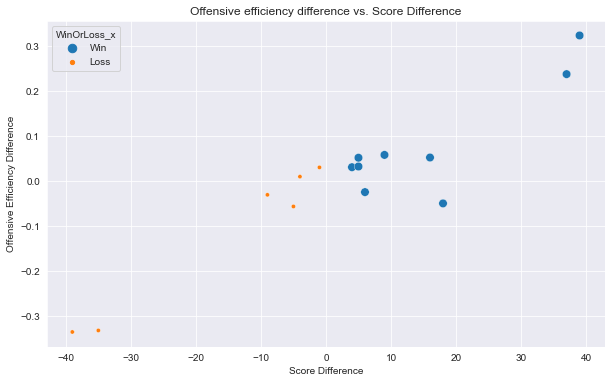

In [387]:
kaukauna_game['ScoreDifference'] = kaukauna_game['kauk_Points'] - kaukauna_game['Opp_Points']
kaukauna_game['OffensiveEfficiencyDifference'] = kaukauna_game['kauk_OffensiveEfficiency'] - kaukauna_game['Opp_OffensiveEfficiency']
kaukauna_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = kaukauna_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [229]:
# Kimberly offense correlations
kimberly_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.587315,0.929067,-0.072762,0.663785,0.063447,0.464459,0.924174,0.891906,-0.646620,0.646620
FieldGoalAttempts,0.587315,1.000000,0.491344,0.198458,0.224430,0.019529,-0.206442,0.341418,0.322169,-0.132380,0.132380
FieldGoalsMade,0.929067,0.491344,1.000000,-0.107152,0.786761,0.062196,0.615210,0.945604,0.947954,-0.652483,0.652483
OffensiveRebounds,-0.072762,0.198458,-0.107152,1.000000,-0.073239,0.152430,0.173563,-0.011586,-0.022207,0.257614,-0.257614
Assists,0.663785,0.224430,0.786761,-0.073239,1.000000,-0.025139,0.719270,0.799210,0.826965,-0.700301,0.700301
Turnovers,0.063447,0.019529,0.062196,0.152430,-0.025139,1.000000,-0.156443,-0.043295,-0.054278,-0.057343,0.057343
OffensiveEfficiency,0.464459,-0.206442,0.615210,0.173563,0.719270,-0.156443,1.000000,0.759499,0.779097,-0.498698,0.498698
EfficientPointsScored,0.924174,0.341418,0.945604,-0.011586,0.799210,-0.043295,0.759499,1.000000,0.989174,-0.652676,0.652676
RawEOP,0.891906,0.322169,0.947954,-0.022207,0.826965,-0.054278,0.779097,0.989174,1.000000,-0.633767,0.633767
Loss,-0.646620,-0.132380,-0.652483,0.257614,-0.700301,-0.057343,-0.498698,-0.652676,-0.633767,1.000000,-1.000000


In [230]:
# Kimberly offense compared in wins and losses 
kimberly_win = kimberly_num[kimberly_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss = kimberly_num[kimberly_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_offense = pd.concat(frames)
kimberly_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
Averages in Wins,86.285714,61.285714,34.428571,9.785714,18.785714,8.428571,0.674793,58.464146,67.110845
Number of Losses,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Averages in Losses,59.500000,58.500000,23.500000,13.000000,10.000000,8.000000,0.558477,32.755495,37.102826


In [231]:
# Kimberly opponent's offense correlations
kimberly_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.599061,0.910916,0.163464,0.536370,0.084303,0.557733,0.911037,0.898322,-0.083855,0.083855
FieldGoalAttempts,0.599061,1.000000,0.502100,0.048065,0.535269,-0.167752,-0.073068,0.323722,0.341414,-0.025831,0.025831
FieldGoalsMade,0.910916,0.502100,1.000000,0.392159,0.427707,0.319152,0.572835,0.869479,0.852182,-0.177822,0.177822
OffensiveRebounds,0.163464,0.048065,0.392159,1.000000,0.273568,0.658701,0.199721,0.226227,0.256125,-0.187956,0.187956
Assists,0.536370,0.535269,0.427707,0.273568,1.000000,0.058788,0.375729,0.510495,0.595910,-0.100920,0.100920
Turnovers,0.084303,-0.167752,0.319152,0.658701,0.058788,1.000000,-0.132454,0.020216,0.022908,0.304856,-0.304856
OffensiveEfficiency,0.557733,-0.073068,0.572835,0.199721,0.375729,-0.132454,1.000000,0.847176,0.854924,-0.549944,0.549944
EfficientPointsScored,0.911037,0.323722,0.869479,0.226227,0.510495,0.020216,0.847176,1.000000,0.993871,-0.317662,0.317662
RawEOP,0.898322,0.341414,0.852182,0.256125,0.595910,0.022908,0.854924,0.993871,1.000000,-0.325951,0.325951
Loss,-0.083855,-0.025831,-0.177822,-0.187956,-0.100920,0.304856,-0.549944,-0.317662,-0.325951,1.000000,-1.000000


In [232]:
# Kimberly opponent's offense compared in wins and losses 
kimberly_win_opp = kimberly_opp_num[kimberly_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss_opp = kimberly_opp_num[kimberly_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_opp = pd.concat(frames)
kimberly_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000
Averages in Wins,59.454545,51.272727,19.818182,5.636364,10.181818,13.454545,0.433034,25.95947,29.307727
Number of Losses,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
Averages in Losses,62.000000,52.000000,22.000000,7.000000,11.000000,7.000000,0.523810,32.47619,36.855238


In [233]:
# Neenah offense correlations
neenah_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.655158,0.868493,0.419826,0.525179,0.131914,0.730190,0.968054,0.942936,0.084435,-0.084435
FieldGoalAttempts,0.655158,1.000000,0.814908,0.572124,0.545127,0.008671,0.443552,0.621023,0.644225,0.080307,-0.080307
FieldGoalsMade,0.868493,0.814908,1.000000,0.390486,0.721255,0.168293,0.749719,0.875573,0.903968,0.117037,-0.117037
OffensiveRebounds,0.419826,0.572124,0.390486,1.000000,0.253480,0.316915,0.377256,0.424677,0.416806,-0.312411,0.312411
Assists,0.525179,0.545127,0.721255,0.253480,1.000000,0.369525,0.597356,0.574236,0.699144,-0.013232,0.013232
Turnovers,0.131914,0.008671,0.168293,0.316915,0.369525,1.000000,-0.096086,0.029147,0.083118,-0.213562,0.213562
OffensiveEfficiency,0.730190,0.443552,0.749719,0.377256,0.597356,-0.096086,1.000000,0.873203,0.890729,0.010158,-0.010158
EfficientPointsScored,0.968054,0.621023,0.875573,0.424677,0.574236,0.029147,0.873203,1.000000,0.986439,0.054986,-0.054986
RawEOP,0.942936,0.644225,0.903968,0.416806,0.699144,0.083118,0.890729,0.986439,1.000000,0.042044,-0.042044
Loss,0.084435,0.080307,0.117037,-0.312411,-0.013232,-0.213562,0.010158,0.054986,0.042044,1.000000,-1.000000


In [234]:
# Neenah offense compared in wins and losses
neenah_win = neenah_num[neenah_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss = neenah_num[neenah_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_offense = pd.concat(frames)
neenah_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
Averages in Wins,72.947368,52.789474,27.842105,9.631579,18.263158,10.578947,0.637696,46.915205,55.868833
Number of Losses,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Averages in Losses,77.000000,55.000000,30.000000,5.000000,18.000000,7.000000,0.640000,49.280000,58.035200


In [235]:
# Neenah opponent's offense correlations
neenah_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.556818,0.913449,0.209839,0.768052,-0.143364,0.690750,0.943930,0.932952,-0.351494,0.351494
FieldGoalAttempts,0.556818,1.000000,0.772517,0.652341,0.366198,-0.272877,0.442826,0.586905,0.557271,-0.229049,0.229049
FieldGoalsMade,0.913449,0.772517,1.000000,0.405013,0.743902,-0.312265,0.778634,0.939831,0.931008,-0.402351,0.402351
OffensiveRebounds,0.209839,0.652341,0.405013,1.000000,0.071366,-0.235586,0.453704,0.354415,0.342110,0.021296,-0.021296
Assists,0.768052,0.366198,0.743902,0.071366,1.000000,-0.191867,0.698283,0.795303,0.817289,-0.447853,0.447853
Turnovers,-0.143364,-0.272877,-0.312265,-0.235586,-0.191867,1.000000,-0.666297,-0.407003,-0.408686,0.105357,-0.105357
OffensiveEfficiency,0.690750,0.442826,0.778634,0.453704,0.698283,-0.666297,1.000000,0.880977,0.897409,-0.288251,0.288251
EfficientPointsScored,0.943930,0.586905,0.939831,0.354415,0.795303,-0.407003,0.880977,1.000000,0.996345,-0.375680,0.375680
RawEOP,0.932952,0.557271,0.931008,0.342110,0.817289,-0.408686,0.897409,0.996345,1.000000,-0.346474,0.346474
Loss,-0.351494,-0.229049,-0.402351,0.021296,-0.447853,0.105357,-0.288251,-0.375680,-0.346474,1.000000,-1.000000


In [236]:
# Neenah opponent's offense compared in wins and losses 
neenah_win_opp = neenah_opp_num[neenah_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss_opp = neenah_opp_num[neenah_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_opp = pd.concat(frames)
neenah_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
Averages in Wins,53.428571,42.071429,18.071429,6.785714,10.857143,13.357143,0.489554,26.982727,31.170351
Number of Losses,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Averages in Losses,68.500000,47.500000,25.000000,6.500000,15.000000,11.500000,0.585616,41.698630,45.954110


In [237]:
# Oshkosh North offense correlations
oshkosh_north_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.584716,0.915549,0.147417,0.523737,-0.144103,0.744698,0.929936,0.901096,-0.468198,0.468198
FieldGoalAttempts,0.584716,1.000000,0.714874,0.610996,0.312072,0.194950,0.193250,0.425710,0.415479,-0.297083,0.297083
FieldGoalsMade,0.915549,0.714874,1.000000,0.244708,0.475020,0.045175,0.669739,0.845985,0.826504,-0.463503,0.463503
OffensiveRebounds,0.147417,0.610996,0.244708,1.000000,0.149106,0.084153,0.193571,0.187713,0.206279,-0.420778,0.420778
Assists,0.523737,0.312072,0.475020,0.149106,1.000000,-0.020126,0.613508,0.620962,0.699869,-0.392756,0.392756
Turnovers,-0.144103,0.194950,0.045175,0.084153,-0.020126,1.000000,-0.481025,-0.343258,-0.322305,0.086989,-0.086989
OffensiveEfficiency,0.744698,0.193250,0.669739,0.193571,0.613508,-0.481025,1.000000,0.930992,0.942214,-0.547796,0.547796
EfficientPointsScored,0.929936,0.425710,0.845985,0.187713,0.620962,-0.343258,0.930992,1.000000,0.992061,-0.563072,0.563072
RawEOP,0.901096,0.415479,0.826504,0.206279,0.699869,-0.322305,0.942214,0.992061,1.000000,-0.584447,0.584447
Loss,-0.468198,-0.297083,-0.463503,-0.420778,-0.392756,0.086989,-0.547796,-0.563072,-0.584447,1.000000,-1.000000


In [238]:
# Oshkosh North offense compared in wins and losses 
oshkosh_north_win = oshkosh_north_num[oshkosh_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss = oshkosh_north_num[oshkosh_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_offense = pd.concat(frames)
oshkosh_north_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,77.333333,52.833333,27.666667,9.833333,15.166667,14.166667,0.590601,45.951372,52.895627
Number of Losses,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
Averages in Losses,67.785714,47.928571,22.785714,6.285714,12.142857,14.928571,0.508966,34.826483,39.385442


In [239]:
# Oshkosh North opponent's offense correlations
oshkosh_north_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.739077,0.857884,0.498834,0.110340,-0.377748,0.604146,0.933502,0.863132,-0.505060,0.505060
FieldGoalAttempts,0.739077,1.000000,0.866706,0.702539,0.049230,-0.021581,0.337339,0.646916,0.587995,-0.156191,0.156191
FieldGoalsMade,0.857884,0.866706,1.000000,0.749512,0.262217,-0.139857,0.697167,0.888687,0.861617,-0.242779,0.242779
OffensiveRebounds,0.498834,0.702539,0.749512,1.000000,0.439173,0.281526,0.611162,0.592056,0.617480,0.077244,-0.077244
Assists,0.110340,0.049230,0.262217,0.439173,1.000000,0.130641,0.713729,0.384410,0.536835,-0.115748,0.115748
Turnovers,-0.377748,-0.021581,-0.139857,0.281526,0.130641,1.000000,-0.298730,-0.402518,-0.344766,0.535593,-0.535593
OffensiveEfficiency,0.604146,0.337339,0.697167,0.611162,0.713729,-0.298730,1.000000,0.845594,0.910992,-0.350504,0.350504
EfficientPointsScored,0.933502,0.646916,0.888687,0.592056,0.384410,-0.402518,0.845594,1.000000,0.983013,-0.477050,0.477050
RawEOP,0.863132,0.587995,0.861617,0.617480,0.536835,-0.344766,0.910992,0.983013,1.000000,-0.445193,0.445193
Loss,-0.505060,-0.156191,-0.242779,0.077244,-0.115748,0.535593,-0.350504,-0.477050,-0.445193,1.000000,-1.000000


In [240]:
# Oshkosh North opponent's offense compared in wins and losses 
oshkosh_north_win_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_opp = pd.concat(frames)
oshkosh_north_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,4.00,4.0,4.00,4.0,4.00,4.0,4.000000,4.000000,4.000000
Averages in Wins,63.75,55.0,24.75,10.5,14.75,14.5,0.530239,33.861236,40.126604
Number of Losses,10.00,10.0,10.00,10.0,10.00,10.0,10.000000,10.000000,10.000000
Averages in Losses,78.50,57.6,27.80,10.0,16.00,10.4,0.589464,46.851748,53.885474


In [241]:
# Oshkosh West offense correlations
oshkosh_west_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.392947,0.836423,0.284471,0.491872,-0.250623,0.720816,0.917889,0.892212,-0.574268,0.574268
FieldGoalAttempts,0.392947,1.000000,0.426831,0.747958,0.092675,-0.523880,0.075332,0.231711,0.212288,0.095195,-0.095195
FieldGoalsMade,0.836423,0.426831,1.000000,0.255545,0.488761,-0.218637,0.784362,0.878663,0.862923,-0.411673,0.411673
OffensiveRebounds,0.284471,0.747958,0.255545,1.000000,0.227594,-0.351508,0.208287,0.260498,0.269572,-0.026476,0.026476
Assists,0.491872,0.092675,0.488761,0.227594,1.000000,0.164165,0.623959,0.587996,0.694258,-0.122103,0.122103
Turnovers,-0.250623,-0.523880,-0.218637,-0.351508,0.164165,1.000000,-0.323577,-0.295579,-0.237321,0.364200,-0.364200
OffensiveEfficiency,0.720816,0.075332,0.784362,0.208287,0.623959,-0.323577,1.000000,0.932109,0.942398,-0.629460,0.629460
EfficientPointsScored,0.917889,0.231711,0.878663,0.260498,0.587996,-0.295579,0.932109,1.000000,0.989998,-0.658559,0.658559
RawEOP,0.892212,0.212288,0.862923,0.269572,0.694258,-0.237321,0.942398,0.989998,1.000000,-0.609015,0.609015
Loss,-0.574268,0.095195,-0.411673,-0.026476,-0.122103,0.364200,-0.629460,-0.658559,-0.609015,1.000000,-1.000000


In [242]:
# Oshkosh West offense compared in wins and losses 
oshkosh_west_win = oshkosh_west_num[oshkosh_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss = oshkosh_west_num[oshkosh_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_offense = pd.concat(frames)
oshkosh_west_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
Averages in Wins,66.375000,48.625000,23.750000,8.125000,13.000000,11.125000,0.567477,37.855558,43.470031
Number of Losses,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Losses,57.181818,50.181818,20.636364,7.909091,12.090909,14.636364,0.471573,27.196747,31.722990


In [243]:
# Oshkosh West opponent's offense correlations
oshkosh_west_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.506406,0.772466,0.124078,0.583225,0.040562,0.626073,0.899891,0.883047,-0.535332,0.535332
FieldGoalAttempts,0.506406,1.000000,0.583486,0.696310,0.249669,-0.240256,0.284867,0.435839,0.448519,-0.115005,0.115005
FieldGoalsMade,0.772466,0.583486,1.000000,0.209883,0.694198,0.069065,0.856495,0.909765,0.907065,-0.527713,0.527713
OffensiveRebounds,0.124078,0.696310,0.209883,1.000000,-0.001389,0.095586,0.047327,0.089278,0.119509,0.198861,-0.198861
Assists,0.583225,0.249669,0.694198,-0.001389,1.000000,0.098905,0.835713,0.798561,0.843274,-0.454578,0.454578
Turnovers,0.040562,-0.240256,0.069065,0.095586,0.098905,1.000000,-0.069203,0.001458,0.049331,0.251419,-0.251419
OffensiveEfficiency,0.626073,0.284867,0.856495,0.047327,0.835713,-0.069203,1.000000,0.897547,0.892700,-0.637187,0.637187
EfficientPointsScored,0.899891,0.435839,0.909765,0.089278,0.798561,0.001458,0.897547,1.000000,0.991964,-0.631184,0.631184
RawEOP,0.883047,0.448519,0.907065,0.119509,0.843274,0.049331,0.892700,0.991964,1.000000,-0.610042,0.610042
Loss,-0.535332,-0.115005,-0.527713,0.198861,-0.454578,0.251419,-0.637187,-0.631184,-0.610042,1.000000,-1.000000


In [244]:
# Oshkosh West opponent's offense compared in wins and losses 
oshkosh_west_win_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_opp = pd.concat(frames)
oshkosh_west_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Averages in Wins,58.000000,46.500000,19.0,9.000000,10.750000,13.750000,0.478013,27.908594,31.852875
Number of Losses,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Losses,66.727273,48.090909,24.0,7.545455,14.818182,12.090909,0.571921,38.278466,44.446028


In [245]:
fva_wins = [appleton_east_win, appleton_north_win, appleton_west_win, fond_du_lac_win, hortonville_win, kaukauna_win, kimberly_win, neenah_win, oshkosh_north_win, oshkosh_west_win]
fva_losses = [appleton_east_loss, appleton_north_loss, appleton_west_loss, fond_du_lac_loss, hortonville_loss, kimberly_loss, neenah_loss, oshkosh_north_loss, oshkosh_west_loss]
fva_wins = pd.concat(fva_wins)
fva_wins = fva_wins.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fva_losses = pd.concat(fva_losses)
fva_losses = fva_losses.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [fva_wins, fva_losses]
fva_compared = pd.concat(frames)
fva_compared

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
Number of Wins,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
Averages in Wins,73.742857,53.266667,26.914286,8.866667,16.123810,11.209524,0.595022,44.598170,51.823082
Number of Losses,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
Averages in Losses,58.349398,49.759036,20.927711,7.373494,11.951807,13.686747,0.482023,28.629595,33.123142


In [246]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [247]:
# Features for machine learning model
X = efficiency_fva_num.drop(columns = ['Win', 'Loss'], axis = 1).values
X

array([[73.        , 51.        , 20.        , ...,  0.45762712,
        33.40677966, 35.84135593],
       [72.        , 48.        , 25.        , ...,  0.56521739,
        40.69565217, 46.70956522],
       [86.        , 56.        , 27.        , ...,  0.51898734,
        44.63291139, 50.15493671],
       ...,
       [53.        , 38.        , 20.        , ...,  0.57627119,
        30.54237288, 34.04610169],
       [79.        , 48.        , 27.        , ...,  0.65789474,
        51.97368421, 55.97368421],
       [81.        , 67.        , 31.        , ...,  0.63095238,
        51.10714286, 55.90238095]])

In [248]:
# What we are trying to predict: Total points scored 
y = efficiency_fva.Win
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Win, dtype: uint8

In [249]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(157, 9) (40, 9) (157,) (40,)


In [250]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.8125     0.71875    0.74193548 0.61290323 0.64516129]
0.70625


In [251]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.8125     0.8125     0.70967742 0.77419355 0.67741935]
0.7572580645161291


In [252]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.71875    0.71875    0.74193548 0.70967742 0.64516129]
0.7068548387096775


In [253]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.78125    0.8125     0.70967742 0.67741935 0.61290323]
0.71875


In [254]:
# Best Model
svc = SVC(probability = True)
r2 = cross_val_score(svc, train_X, train_y, cv = 5)
print(r2)
print(r2.mean())

[0.75       0.78125    0.70967742 0.70967742 0.70967742]
0.7320564516129033


In [255]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[12:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel